In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sn # data visualization
import sklearn.model_selection as skms # test/train split
import sklearn.ensemble as skensemble # models
import sklearn.tree as sktree
import statsmodels

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/superconductivty-data-data-set/unique_m.csv
/kaggle/input/superconductivty-data-data-set/train.csv


For certain materials it can be observed that below a certain critical temperature, the material loses all magnetic resistance and becomes a superconductor. The problem I wished to solve was to take properties of a material and use them to predict the critical temperature. 

In [2]:
raw_df = pd.read_csv("/kaggle/input/superconductivty-data-data-set/train.csv")
raw_df.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
#get list of columns
print(raw_df.columns)

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

Initially, there are 81 features and the value to be predicted 'critical_temp'. To reduce the number of feature I made the inital decision to ignore the 'fie' fields. Then I will go through each group and reduce the number of features by analyzing the corresponding correlation matrix.

<Axes: >

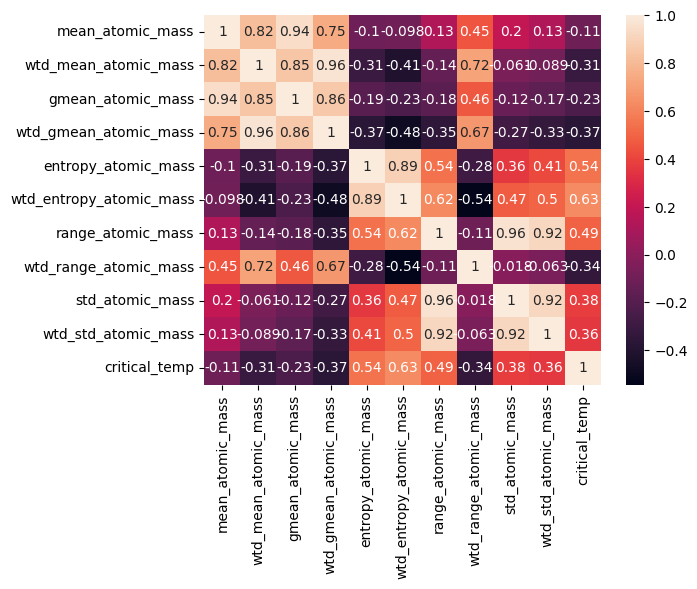

In [4]:
mass_df = raw_df[['mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass','critical_temp']]
sn.heatmap(mass_df.corr(),annot=True)

Based on the correlation matrix above, 'wtd_gmean_atomic_mass','mean_atomic_mass', and 'wtd_mean_atomic_mass' can be dropped as there is a high correlation with the 'gmean_atomic_mass' feature. Additionally, 'wtd_std_atomic_mass' and 'std_atomic_mass' can be dropped because of the correlation to 'range_atomic_mass'. Finally, 'wtd_entropy_atomic_mass' can be dropped for its correlation to 'entropy_atomic_mass'.

In [5]:
final_data_df_columns = ['number_of_elements','gmean_atomic_mass', 'entropy_atomic_mass','range_atomic_mass', 
                         'wtd_range_atomic_mass']

<Axes: >

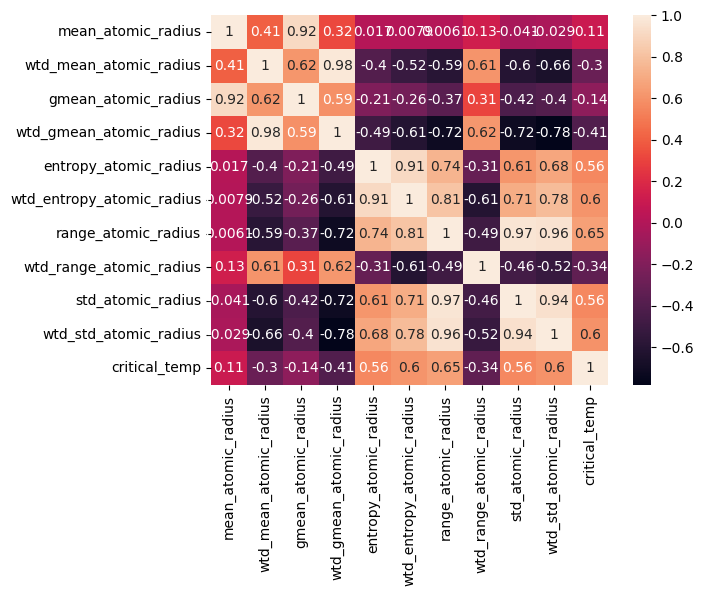

In [6]:
#similar processing with 'radius' fields
radius_df = raw_df[['mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius','critical_temp']]
sn.heatmap(radius_df.corr(),annot=True)

Based on the correlation matrix for radius fields, only the 'gmean_atomic_radius' and 'wtd_entropy_atomic_radius' remain in the final dataset.

In [7]:
#adding the uncorrelated radius fields to the final feature list
final_data_df_columns.append("gmean_atomic_radius")
final_data_df_columns.append("wtd_entropy_atomic_radius")

<Axes: >

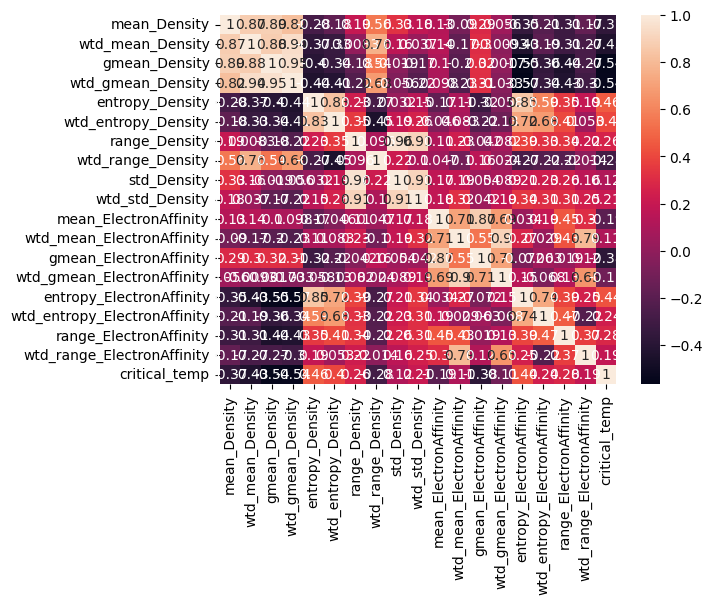

In [8]:
#creating the correlation matrix for the electronaffinity and density features
density_df = raw_df[['mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity','critical_temp']]
sn.heatmap(density_df.corr(),annot=True)

<Axes: >

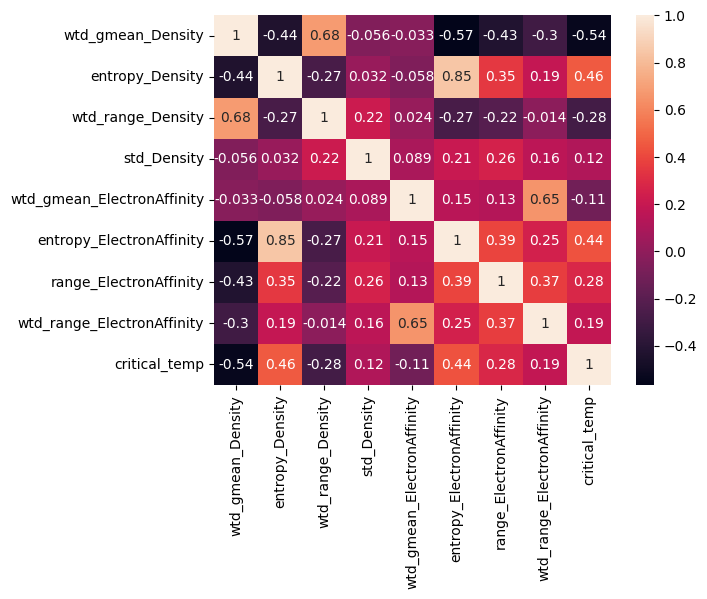

In [9]:
#removing the more correlated fields
reduced_density_df = raw_df[[
       'wtd_gmean_Density', 'entropy_Density', 
    'wtd_range_Density', 'std_Density',
       'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity','critical_temp']]
sn.heatmap(reduced_density_df.corr(),annot=True)

In [10]:
#adding the remaining fields
final_data_df_columns.extend([
       'wtd_gmean_Density', 'std_Density','entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity'])

<Axes: >

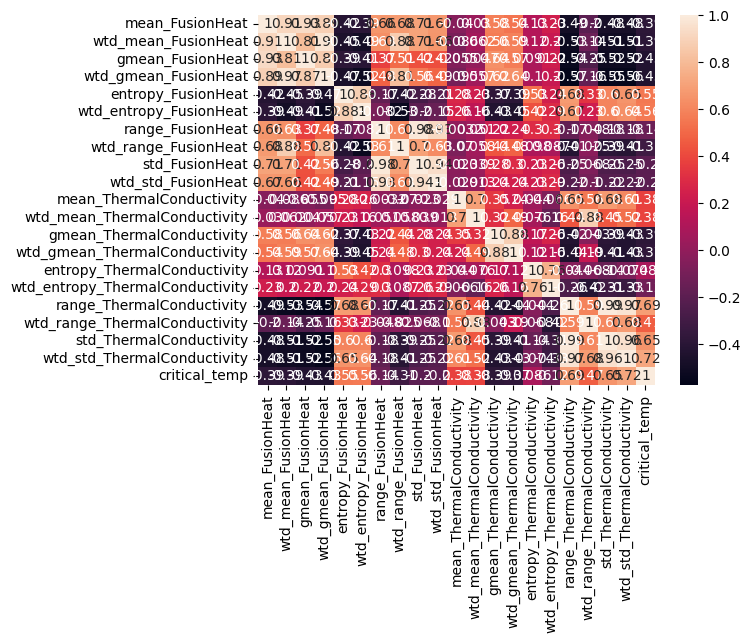

In [11]:
#creating the correlation matrix for thermalconductivity and fusionheat features
fusion_df = raw_df[['mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity','critical_temp']]
sn.heatmap(fusion_df.corr(),annot=True)

<Axes: >

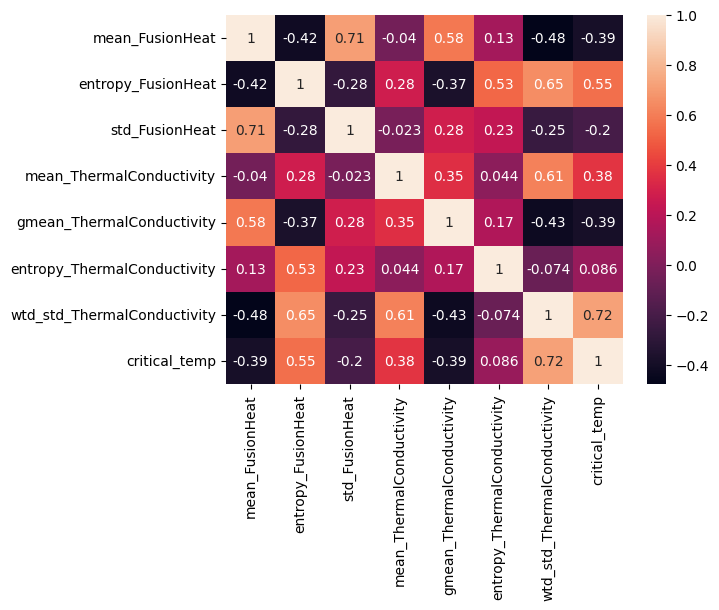

In [12]:
reduced_fusion_df = fusion_df[['mean_FusionHeat',
       'entropy_FusionHeat',  'std_FusionHeat', 
       'mean_ThermalConductivity','gmean_ThermalConductivity', 'entropy_ThermalConductivity', 
        'wtd_std_ThermalConductivity','critical_temp']]
sn.heatmap(reduced_fusion_df.corr(),annot=True)

In [13]:
#adding the remaining fusionheat/electronaffinity features
final_data_df_columns.extend(['mean_FusionHeat','entropy_FusionHeat', 
        'mean_ThermalConductivity', 'entropy_ThermalConductivity'])

<Axes: >

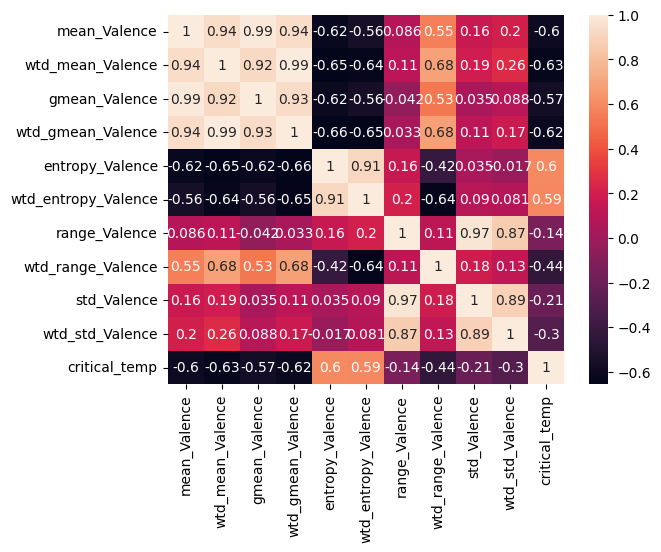

In [14]:
#lastly doing a similar process with the valence fields
valence_df = raw_df[['mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence',
       'critical_temp']]
sn.heatmap(valence_df.corr(),annot=True)

In [15]:
#adding the reduced valence fields
final_data_df_columns.extend(['mean_Valence','std_Valence'])

In [16]:
#creating the processed data frame using the selected features
final_data_df_columns = tuple(final_data_df_columns)
final_data_df = raw_df.loc[:,final_data_df_columns]
data_y = raw_df['critical_temp']
final_data_df.head()

,number_of_elements,gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,gmean_atomic_radius,wtd_entropy_atomic_radius,wtd_gmean_Density,std_Density,entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,mean_FusionHeat,entropy_FusionHeat,mean_ThermalConductivity,entropy_ThermalConductivity,mean_Valence,std_Valence
0,4,66.361592,1.181795,122.90607,31.794921,136.126003,1.207040,53.543811,3306.162897,1.159687,127.05,80.987143,6.9055,1.088575,107.756645,0.308148,2.25,0.433013
1,5,73.132787,1.449309,122.90607,36.161939,141.465215,1.204115,54.095718,3767.403176,1.427997,127.05,81.207857,7.7844,1.374977,172.205316,0.847404,2.00,0.632456
2,4,66.361592,1.181795,122.90607,35.741099,136.126003,1.132547,53.974022,3306.162897,1.159687,127.05,81.207857,6.9055,1.088575,107.756645,0.308148,2.25,0.433013
3,4,66.361592,1.181795,122.90607,33.768010,136.126003,1.173033,53.758486,3306.162897,1.159687,127.05,81.097500,6.9055,1.088575,107.756645,0.308148,2.25,0.433013
4,4,66.361592,1.181795,122.90607,27.848743,136.126003,1.261194,53.117029,3306.162897,1.159687,127.05,80.766429,6.9055,1.088575,107.756645,0.308148,2.25,0.433013


In [17]:
#split the data into training and test with testing set being 30% of the full data
X_train, X_test, y_train, y_test = skms.train_test_split(final_data_df,data_y,test_size=0.3)

In [18]:
#initializing and training an Adaboost model and using GridSearch to find the best parameters
adaboost_model = skensemble.AdaBoostRegressor()
adaboost_parameters = {"n_estimators":[50,70,100],"estimator":[
    sktree.DecisionTreeRegressor(max_depth=14),sktree.DecisionTreeRegressor(max_depth=15),
    sktree.DecisionTreeRegressor(max_depth=16)],"learning_rate":[0.3,0.2,0.1]}
adaboost_grid = skms.GridSearchCV(adaboost_model,adaboost_parameters)
adaboost_grid.fit(X_train,y_train)
adaboost_grid.best_params_

{'estimator': DecisionTreeRegressor(max_depth=16),
 'learning_rate': 0.2,
 'n_estimators': 100}

In [19]:
final_model = adaboost_grid.best_estimator_
print(skms.cross_val_score(final_model,X_train,y_train))
skms.cross_val_score(final_model,X_test,y_test)

[0.90190066 0.89706237 0.90360626 0.89507892 0.88979302]


array([0.88005502, 0.8625847 , 0.88420668, 0.86956863, 0.88211698])

In [20]:
#training random forest and gradient boosting model to compare with the adaboost
rf_model = skensemble.RandomForestRegressor()
gradboost_model = skensemble.HistGradientBoostingRegressor()
rf_parameters = {"n_estimators":[150,200,250],
                 "criterion":['squared_error', 'friedman_mse'],
                 "max_features":["sqrt","log2"],"max_samples":[3500,4000,5000]}
gradboost_parameters = {"max_iter":[50,75,100],
                        "learning_rate":[0.1,0.3,0.5],"max_leaf_nodes":[31,62,124]}
rf_grid = skms.GridSearchCV(rf_model,rf_parameters)
gradboost_grid = skms.GridSearchCV(gradboost_model,gradboost_parameters)
rf_grid.fit(X_train,y_train)
gradboost_grid.fit(X_train,y_train)
print(rf_grid.best_params_)
print(gradboost_grid.best_params_)

{'criterion': 'squared_error', 'max_features': 'log2', 'max_samples': 5000, 'n_estimators': 250}
{'learning_rate': 0.1, 'max_iter': 100, 'max_leaf_nodes': 124}


In [21]:
#random forest scoring
final_rf_model = rf_grid.best_estimator_
print(skms.cross_val_score(final_rf_model,X_train,y_train))
skms.cross_val_score(final_rf_model,X_test,y_test)

[0.90218617 0.90006928 0.90080035 0.89053701 0.89602247]


array([0.88915635, 0.87710813, 0.89219381, 0.87847261, 0.88193579])

In [22]:
#gradient boosting scoring
final_gradboost_model = gradboost_grid.best_estimator_
print(skms.cross_val_score(final_gradboost_model,X_train,y_train))
skms.cross_val_score(final_gradboost_model,X_test,y_test)

[0.9066582  0.90276628 0.90310643 0.89337493 0.8975275 ]


array([0.88470872, 0.87173178, 0.8882205 , 0.87161439, 0.8865355 ])

In conclusion, based on the cross-validation score of the emsemble models I tried, the random forest model seemed like the best one. Additionally,the random forest model was able to achieve a $R^2$ score around 0.88 on the testing data which is somewhat good. However, after going through different hyperparameters I feel like some of the error can be attributed to variance from the data. I feel like I may need more samples, and to narrow the amount of parameters a bit more before deploying an application that uses this model. 